In [22]:
import numpy as np
import os
import glob
import cv2
import matplotlib.pyplot as plt
import insightface
from insightface.app import FaceAnalysis
from insightface.data import get_image

In [72]:
app = FaceAnalysis(name='buffalo_l')
app.prepare(ctx_id=0, det_size=(640, 640))

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/matteomakovec/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/matteomakovec/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/matteomakovec/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/matteomakovec/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/matteomakovec/.insightface/models/buffalo_l/w600k_r50.onnx recognit

In [73]:
dir_path = r'images/input'
images = []

for file_path in os.listdir(dir_path):
    if os.path.isfile(os.path.join(dir_path, file_path)):
        if file_path.endswith('.jpeg') or file_path.endswith('.jpg') or file_path.endswith('.png'):
            images.append(file_path)
print(images)

['Studio-Headshots-LinkedIn.jpeg', 'PH-76-Edit.jpeg']


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
inswapper-shape: [1, 3, 128, 128]


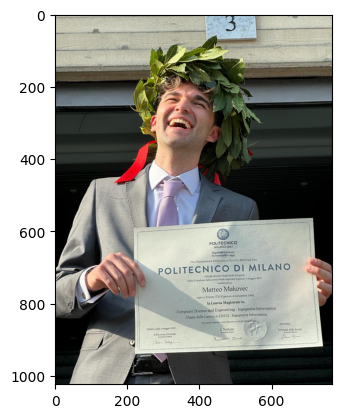

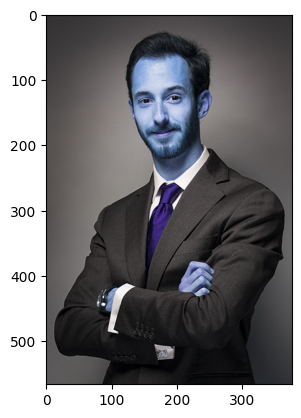

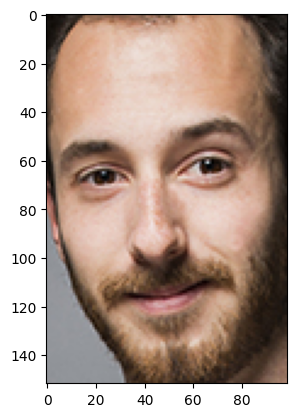

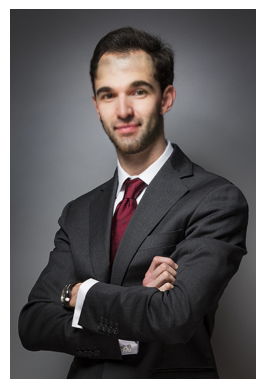

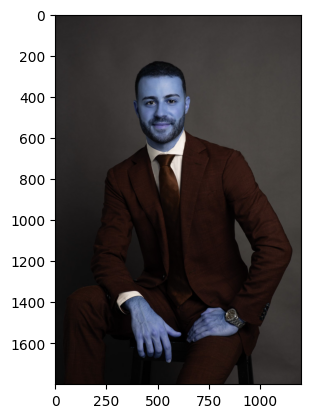

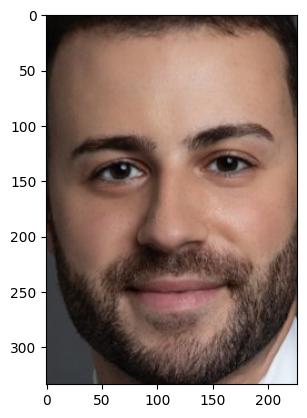

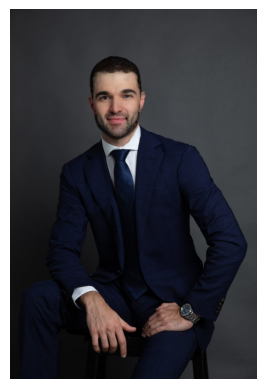

In [74]:
swapper = insightface.model_zoo.get_model('model/inswapper_128.onnx', download=False, download_zip=False)
mattmako = cv2.imread('images/mine/a64b2c09-d85b-425b-8ffb-c5a3cc1ec764.JPG')
plt.imshow(mattmako[:, :, ::-1])
plt.show()

for image in images:
    img = cv2.imread(dir_path + "/" + image)
    faces = app.get(img)
    source_faces = faces[0]
    plt.imshow(img)
    plt.show()

    bbox = source_faces['bbox']
    bbox = [int(b) for b in bbox]
    plt.imshow(img[bbox[1]:bbox[3], bbox[0]:bbox[2], ::-1])
    plt.show()

    mattmako_faces = app.get(mattmako)
    mattmako_face = mattmako_faces[0]

    res = img.copy()
    for face in faces:
        res = swapper.get(res, face, mattmako_face, paste_back=True)

    fig, ax = plt.subplots()
    ax.imshow(res[:, :, ::-1])
    ax.axis('off')
    plt.show()

    filename = 'images/output/' + image
    cv2.imwrite(filename, res)